In [1]:
#importing sql database
import sqlite3

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#connecting database
data ='database.sqlite'
con = sqlite3.connect(data)

In [4]:
cursor = con.cursor()
cursor.execute("select name FROM sqlite_Master where type='table'; ")

In [5]:
print(cursor.fetchall())

[('Iris',)]


In [6]:
sql = "select * from Iris "
df = pd.read_sql_query(sql,con)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

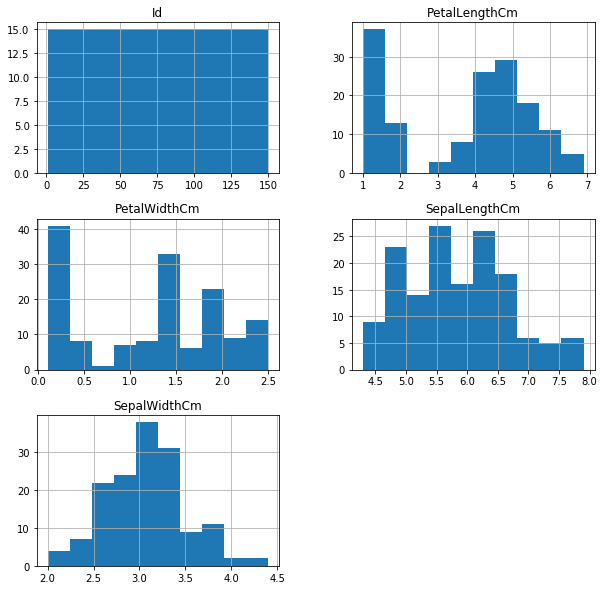

In [11]:
#histograms
df.hist(figsize=[10,10])
plt.show()

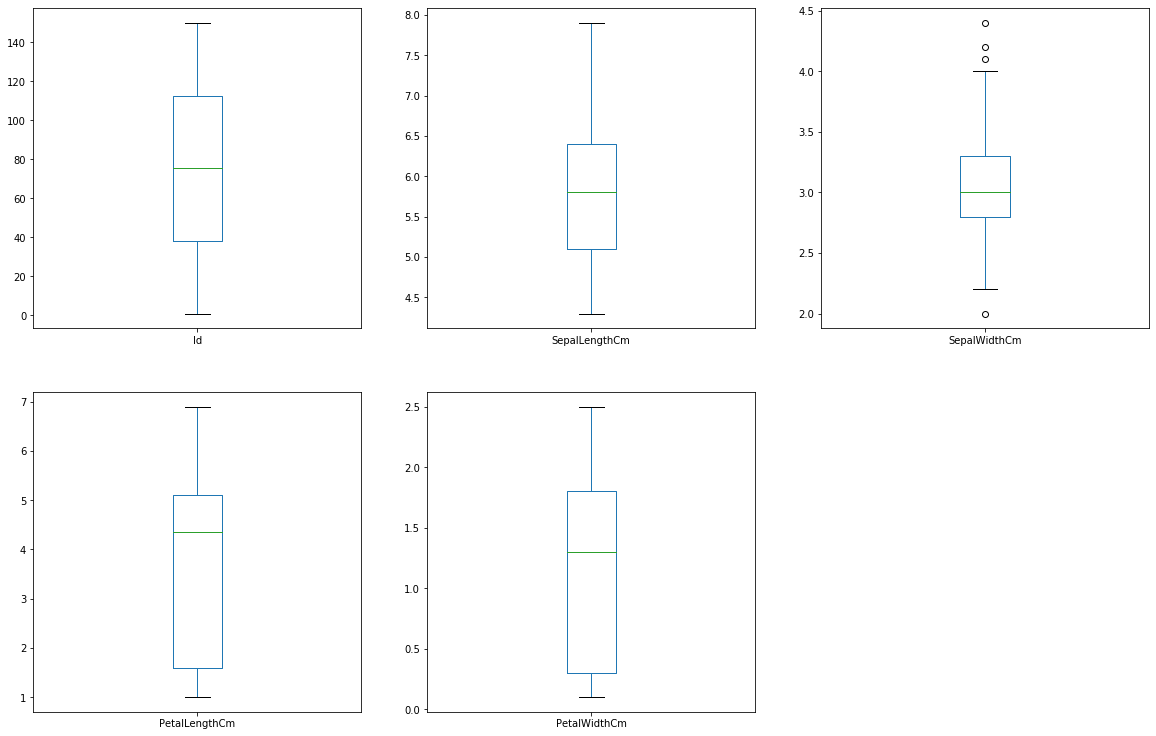

In [12]:
#Boxplot
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=[20,20])
plt.show()

In [13]:
df["SepalWidthCm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [14]:
# handling outlayers
IQR = df["SepalWidthCm"].quantile(0.75) - df["SepalWidthCm"].quantile(0.25)
IQR

0.5

In [15]:
upper_outlinerLimit = df["SepalWidthCm"].quantile(0.75)+ 1.5*IQR
lower_outlinerLimit = df['SepalWidthCm'].quantile(0.25)- 1.5*IQR
print(upper_outlinerLimit)
print(lower_outlinerLimit)

4.05
2.05


In [16]:
#outlayers
outliner_values = df[(df["SepalWidthCm"]>=upper_outlinerLimit ) |  (df["SepalWidthCm"]<=lower_outlinerLimit)]
outliner_values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [17]:
d2=df['SepalWidthCm'][15,32,33,60] = df['SepalWidthCm'].quantile(0.95)

C:\Users\udayc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\udayc\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


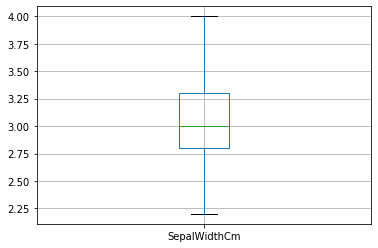

In [18]:
df.boxplot(column=["SepalWidthCm"])

In [19]:
x=df.iloc[:,1:5].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 3.8, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 3.8, 1.5, 0.1],
       [5.5, 3.8, 1.4, 0.2],
       [4.9, 3

In [20]:
#importing machine learning libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

In [21]:
wcss= []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=7)
    kmeans=kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[677.7187333333333,
 149.8331712962963,
 77.79738981324279,
 56.5165875,
 45.76034444444445,
 39.02316758497628,
 34.01677258088128,
 30.417901368760067,
 28.39862120886149]

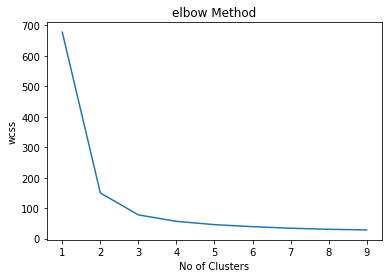

In [22]:
#elbow curve
plt.plot(range(1,10),wcss)
plt.title("elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

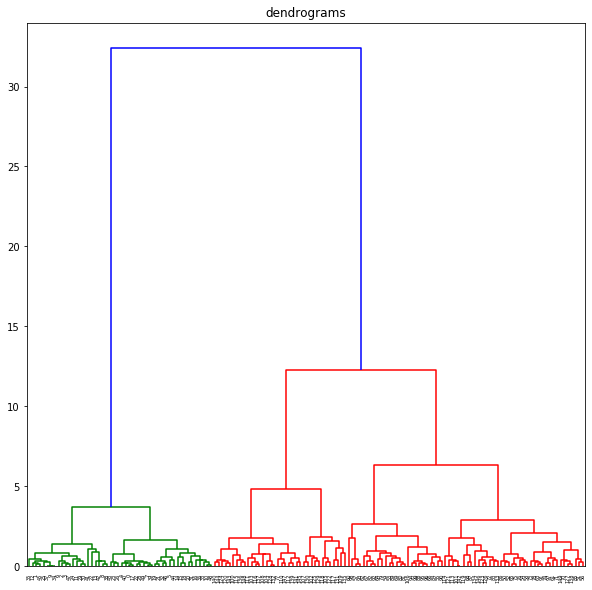

In [23]:
#dendrograms
plt.figure(figsize=(10,10))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [24]:
#fitting k means algorithm
km= KMeans(n_clusters=3,random_state=7)
y_kmeans = km.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [25]:
#kmeans cluster centers
km.cluster_centers_

array([[5.9016129 , 2.77741935, 4.39354839, 1.43387097],
       [5.006     , 3.392     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [26]:
df['clusters']=y_kmeans

In [27]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [28]:
df['clusters'].value_counts()

0    62
1    50
2    38
Name: clusters, dtype: int64

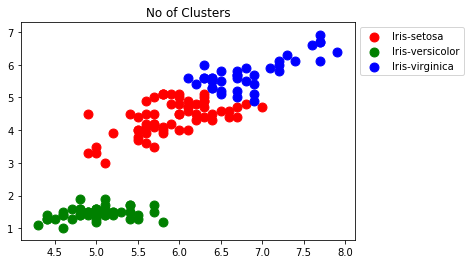

In [29]:
# ploting the scatter plot for the data using kmeans
plt.scatter(x[y_kmeans==0,0] ,x[y_kmeans==0,2],s=80,c='red',label="Iris-setosa ")
plt.scatter(x[y_kmeans==1,0] ,x[y_kmeans==1,2],s=80,c="green",label="Iris-versicolor")
plt.scatter(x[y_kmeans==2,0] ,x[y_kmeans==2,2],s=80,c='blue',label='Iris-virginica')
plt.title("No of Clusters")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [30]:
# appling agglomerative clustering algorithm
cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean", linkage="ward")
cluster= cluster.fit_predict(x)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

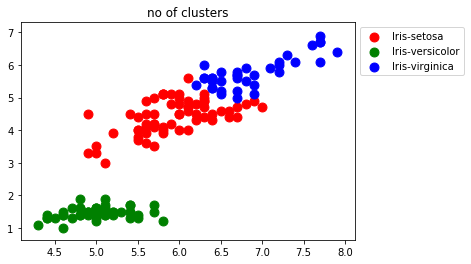

In [31]:
#plotting scatter plot for data with agglomerative clustering
plt.figure()
plt.scatter(x[cluster==0,0], x[cluster==0,2], s=80, c='red',label='Iris-setosa')
plt.scatter(x[cluster==1,0], x[cluster==1,2], s=80, c='green',label='Iris-versicolor')
plt.scatter(x[cluster==2,0], x[cluster==2,2], s=80, c='blue',label='Iris-virginica')
plt.title("no of clusters")
plt.legend(bbox_to_anchor=(1,1))
plt.show()